In [12]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import cv2
import os
from tqdm import tqdm
from glob import glob
from pathlib import Path
from tensorflow.keras.utils import to_categorical

#from sklearn.model_selection import train_test_split
import tensorflow as tf 

from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Model

from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.xception import preprocess_input

#from sklearn.metrics import f1_score
import tensorflow.keras.backend as K

import random
import matplotlib.pyplot as plt

#### Auxiliar Functions

In [13]:
#Function for plotting images.
def plot_sample(X):
    # Plotting 6 sample images
    nb_rows = 3
    nb_cols = 3
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(6, 6))

    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(X[random.randint(0, X.shape[0]-1)])

In [14]:
def read_data(path_list, im_size=(128,128)):
    
    X = []
    y = []
    for path in path_list:
    #extracting the label name from data files.
        tag2idx = {tag:i for i, tag in enumerate(os.listdir(path))} #Problem with the labels. If I split on -2 can't append to y. If I split on -1 labels=image_name
        print(tag2idx)
    #tag2idx = {tag:i for i, tag in enumerate(tqdm(glob(path + "*/*")))}
   
        for im_file in tqdm(glob(path + '*/*')):
            try:
                #print('test1')
                label = im_file.split(os.path.sep)[-1] #os.path.separator is OS agnostic (either '/' or '\')
                print(label)
                im = cv2.imread(im_file)
                #print('test2')
                im = cv2.resize(im, im_size,interpolation=cv2.INTER_LINEAR)
                #print('test3')
                im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
                #print('test4')
                X.append(im)
                print('test5')
                y.append(tag2idx[label])  #appending the label names to y 
                print('test6')
            except Exception as e:
                # In case annotations or metadata are found
                print("Not a picture")
    
    X = np.array(X)
    y = np.eye(len(np.unique(y)))[y].astype(np.uint8)
    
    return X, y

In [15]:
INPUT_SHAPE = (128, 128, 3)
IM_SIZE = (128, 128)
EPOCHS = 50
BATCH_SIZE = 48
TEST_SPLIT = 0.15
VAL_SPLIT = 0.15
RANDOM_STATE = 2020
WEIGHTS_FILE = "weights.h5"#File that stores updated weights
IM_PATH = 'eden_data/Tomato' # Path to the Eden data
IM_PATH2 = 'eden_data/nightshade' # 

In [16]:
data_path1 = str(Path(Path.cwd()).parents[1].joinpath(IM_PATH))
data_path2 = str(Path(Path.cwd()).parents[1].joinpath(IM_PATH2))
path_list = [data_path1,data_path2]

print(path_list)
X,y = read_data(path_list, IM_SIZE)

/s]test5
test6
DSC_0254.JPG
 34%|███▍      | 68/200 [00:26<00:55,  2.39it/s]test5
test6
DSC_0255.JPG
 34%|███▍      | 69/200 [00:27<00:53,  2.43it/s]test5
test6
DSC_0256.JPG
 35%|███▌      | 70/200 [00:27<00:53,  2.44it/s]test5
test6
DSC_0257.JPG
 36%|███▌      | 71/200 [00:28<00:53,  2.41it/s]test5
test6
DSC_0258.JPG
 36%|███▌      | 72/200 [00:28<00:52,  2.45it/s]test5
test6
DSC_0259.JPG
 36%|███▋      | 73/200 [00:28<00:50,  2.50it/s]test5
test6
DSC_0260.JPG
 37%|███▋      | 74/200 [00:29<00:50,  2.48it/s]test5
test6
DSC_0261.JPG
 38%|███▊      | 75/200 [00:29<00:50,  2.47it/s]test5
test6
DSC_0262.JPG
 38%|███▊      | 76/200 [00:30<00:50,  2.44it/s]test5
test6
DSC_0263.JPG
 38%|███▊      | 77/200 [00:30<00:53,  2.29it/s]test5
test6
DSC_0264.JPG
 39%|███▉      | 78/200 [00:30<00:52,  2.34it/s]test5
test6
DSC_0265.JPG
 40%|███▉      | 79/200 [00:31<00:51,  2.36it/s]test5
test6
DSC_0266.JPG
 40%|████      | 80/200 [00:31<00:49,  2.41it/s]test5
test6
DSC_0267.JPG
 40%|████      | 81/200

In [17]:
#os.path.exists(path.li)
#os.listdir(data_path)
print(y)

[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


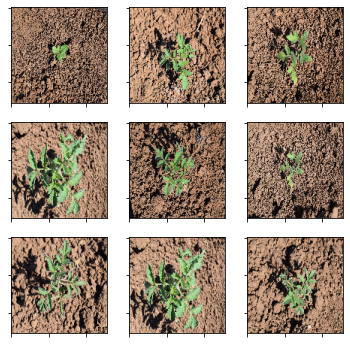

In [18]:
# Class 0
plot_sample(np.array(X[:50]))

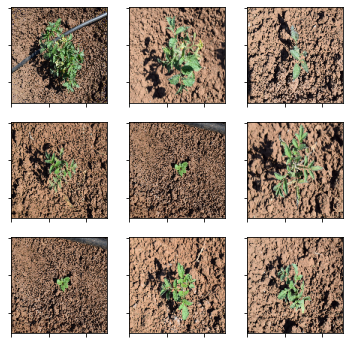

In [19]:
# Class 1
plot_sample(np.array(X[:50]))

In [20]:
print(len(x))

NameError: name 'x' is not defined